# EXP 1 自主生成三种不同的数据

In [15]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import *
from sklearn.datasets import make_circles,make_s_curve,make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
n_samples = 500
random_state = 42
# 超参设置

In [17]:
X_circles,Y_circles = make_circles(n_samples=n_samples,factor=0.5,noise=0.05,random_state=random_state)
X_s,Y_s = make_s_curve(n_samples=n_samples,noise=0.05,random_state=random_state)
X_blob,Y_blob = make_blobs(n_samples=n_samples,random_state=random_state)

In [18]:
class Data:
    def __init__(self,x,y,name):
        self.x = x
        self.y = y
        self.name = name
    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def getName(self):
        return self.name

    def getClassLabel(self):
        return [i for i in set(self.getY())]

    def getClass(self):
        return len(self.getClassLabel())

In [19]:
circle = Data(X_circles,Y_circles,'Circle')
s = Data(X_s,Y_s,'S')
blob = Data(X_blob,Y_blob,"Blob")

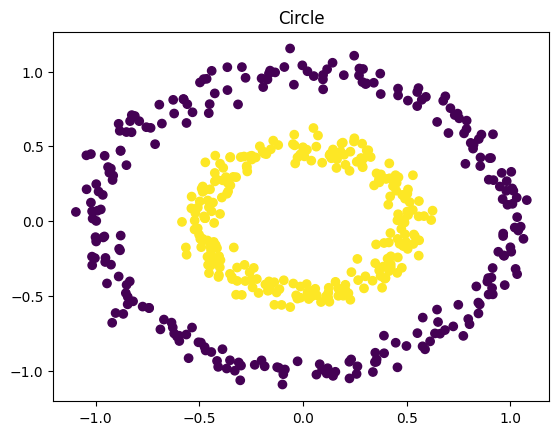

In [20]:
plt.scatter(circle.getX()[:,0],circle.getX()[:,1],c=circle.getY())
plt.title(circle.getName())
plt.show()

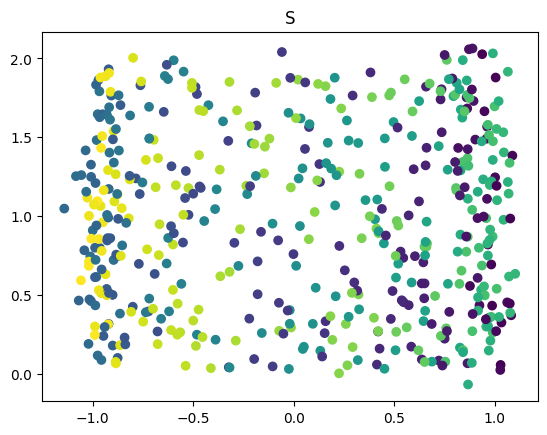

In [21]:
plt.scatter(s.getX()[:,0],s.getX()[:,1],c=s.getY())
plt.title(s.name)
plt.show()

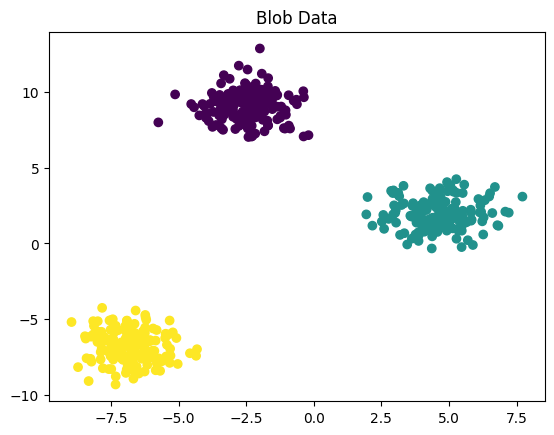

In [22]:
plt.scatter(blob.getX()[:,0],blob.getX()[:,1],c=blob.getY())
plt.title("Blob Data")
plt.show()

# EXP 2 基于三种不同数据，建立K-Means与DBSCAN聚类模型
## KMeans

In [23]:
def make_KMeans_clf(data:Data):
    x_train,x_test,y_train,y_test = train_test_split(data.getX(),data.getY(),random_state=random_state,shuffle=True,test_size=0.3)
    clf = KMeans(max_iter=500,tol=1e-04,random_state=random_state,n_clusters=data.getClass())
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print("KMeans score:",adjusted_rand_score(y_test,y_pred))
    y_true = y_test
    plt.subplot(121)
    plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,label='predict')
    plt.title("Predict Result")
    plt.subplot(122)
    plt.scatter(x_test[:,0],x_test[:,1],c=y_true,label='origin')
    plt.title("Origin Data")
    plt.show()

KMeans score: -0.0038629470586468875


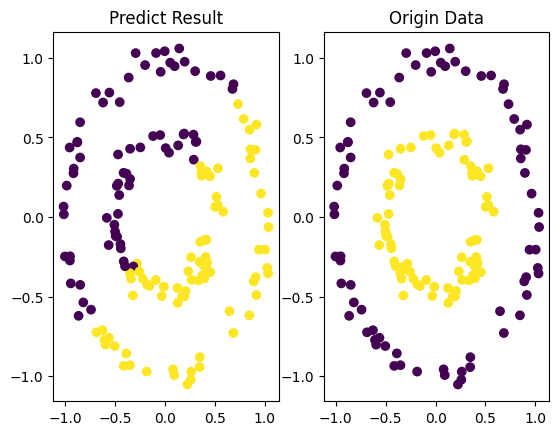

In [24]:
make_KMeans_clf(circle)

KMeans score: 1.0


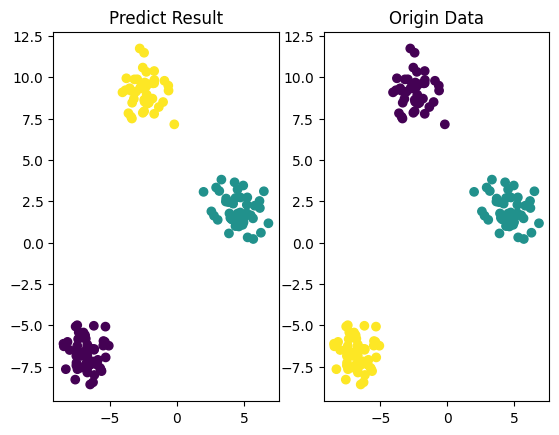

In [25]:
make_KMeans_clf(blob)

In [26]:
def make_DBSCAN_clf(data:Data,min_sample,eps):
    clf = DBSCAN(min_samples=min_sample,eps=eps)
    y_real = data.getY()
    clf.fit(data.getX())
    y_pred = clf.labels_
    print("DBSCAN score:",adjusted_rand_score(y_real,y_pred))
    plt.subplot(121)
    plt.scatter(data.getX()[:,0],data.getX()[:,1],c=y_pred,label='predict')
    plt.title("Predict Result")
    plt.subplot(122)
    plt.scatter(data.getX()[:,0],data.getX()[:,1],c=y_real,label='origin')
    plt.title("Origin Data")
    plt.show()

DBSCAN score: 1.0


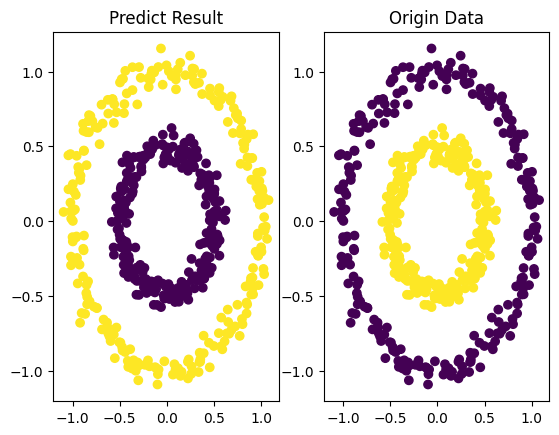

In [27]:
make_DBSCAN_clf(circle,2,0.2)

DBSCAN score: 1.0


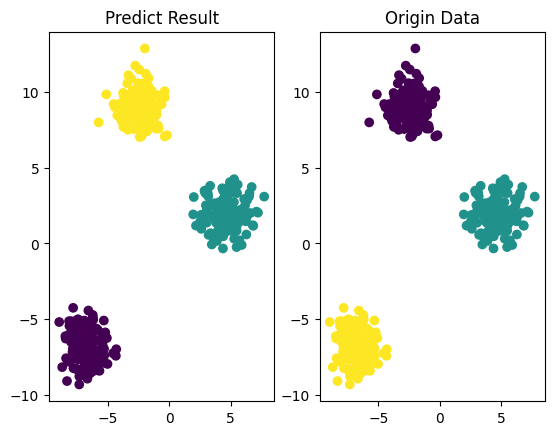

In [28]:
make_DBSCAN_clf(blob,3,2)